## Random Forest


**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

**Load the dataset**

In [ ]:
df = pd.read_csv("weather.csv")
print(df.shape)
df.head()

(16743, 14)


,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80


**Clean column names**

In [ ]:
def clean_col(c):
    c = c.strip().replace(' ', '_').replace('.', '_').replace('-', '_')
    return c.lower()
df.columns = [clean_col(c) for c in df.columns]
df.head()

,data_precipitation,date_full,date_month,date_week_of,date_year,station_city,station_code,station_location,station_state,data_temperature_avg_temp,data_temperature_max_temp,data_temperature_min_temp,data_wind_direction,data_wind_speed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80


**Remove duplicates**

In [ ]:
df = df.drop_duplicates()

**Handle missing values**

In [ ]:
df = df.dropna()

**Select target**

In [ ]:
target = "data_temperature_avg_temp"

y = df[target]
X = df.drop(columns=[target])


**Keep only numeric columns**

In [ ]:
X = X.select_dtypes(include=['float64', 'int64'])

**Train-Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Train Random Forest**

In [ ]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

**Predict**

In [ ]:
y_pred = model.predict(X_test)

**Evaluate metrics**

In [ ]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2   :", r2)
print("MAE  :", mae)
print("RMSE :", rmse)

R2   : 0.9989542818378926
MAE  : 0.32728724992535085
RMSE : 0.6099134436776582


**Feature importance**

In [ ]:
importances = model.feature_importances_
for col, imp in sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True):
    print(col, ":", imp)

data_temperature_min_temp : 0.7191309324655955
data_temperature_max_temp : 0.2798048300937243
data_wind_speed : 0.00033207843529944235
data_wind_direction : 0.00020903811291992483
date_week_of : 0.00020404854093280625
data_precipitation : 0.00019844426290149583
date_month : 0.0001169331831088495
date_year : 3.6949055176168843e-06


**Actual and predicted values**

In [ ]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
location_info = df.loc[y_test.index, ['station_city', 'station_state', 'station_location']]
results_df_with_location = results_df.merge(location_info, left_index=True, right_index=True)
display(results_df_with_location.head())

,Actual,Predicted,station_city,station_state,station_location
8046,84,84.085,Greenville,Mississippi,"Greenville, MS"
1208,42,41.820,Amarillo,Texas,"Amarillo, TX"
3826,61,60.785,Bakersfield,California,"Bakersfield, CA"
99,25,25.100,Moline,Illinois,"Moline, IL"
14776,55,55.085,Columbia,South Carolina,"Columbia, SC"


**Plot Feature Importances (Bar Plot)**

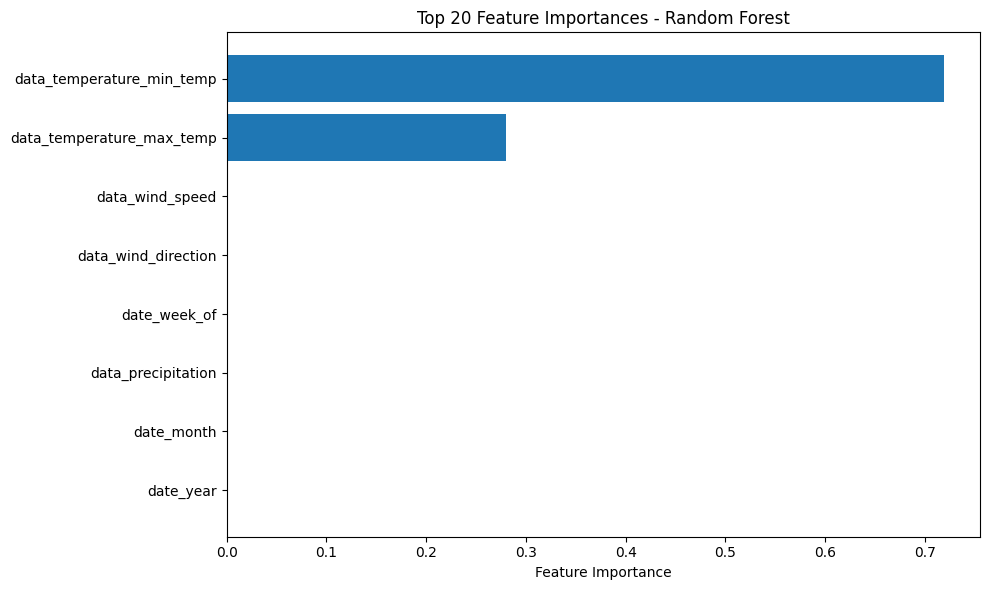

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get importances
importances = model.feature_importances_
feature_names = X.columns

# Sort
indices = np.argsort(importances)[::-1]
sorted_features = feature_names[indices]
sorted_importances = importances[indices]

# Plot
plt.figure(figsize=(10,6))
plt.barh(sorted_features[:20][::-1], sorted_importances[:20][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 20 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

**Plot Actual vs Predicted**

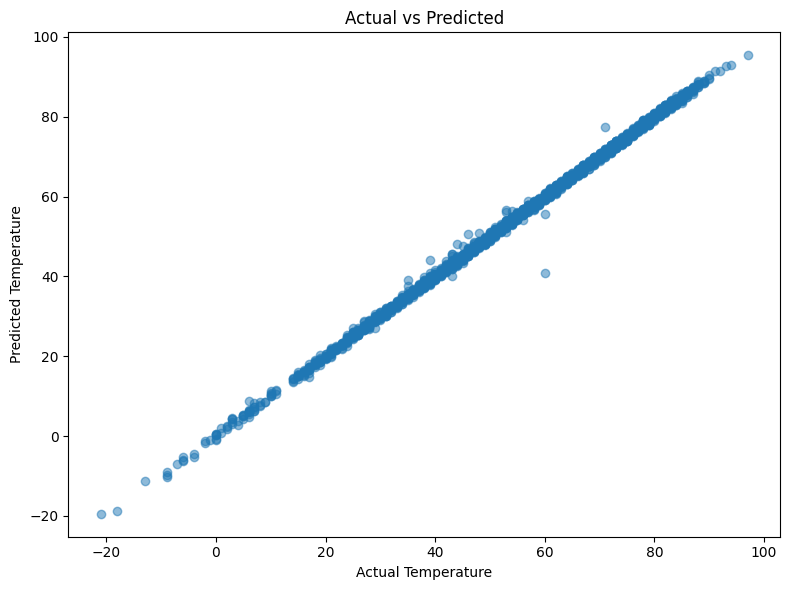

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted")
plt.tight_layout()
plt.show()

**Plot Residuals (Error Plot)**

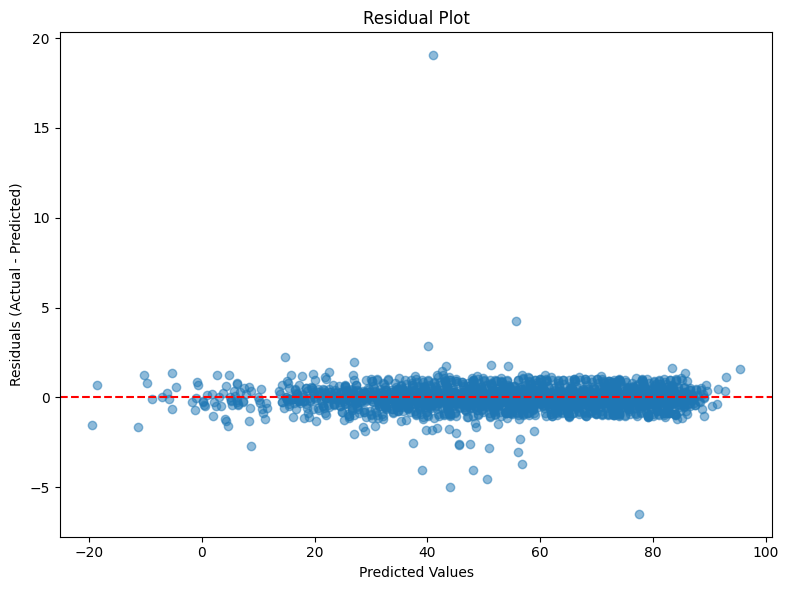

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()


## XGBoost



In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

**Train XGBoost Model**



In [ ]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

**Predict the values with XGBoost**



In [ ]:
xgb_y_pred = xgb_model.predict(X_test)

In [ ]:
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_y_pred))

print("XGBoost R2   :", xgb_r2)
print("XGBoost MAE  :", xgb_mae)
print("XGBoost RMSE :", xgb_rmse)

XGBoost R2   : 0.9987626075744629
XGBoost MAE  : 0.4053715467453003
XGBoost RMSE : 0.6634568987187635


**Feature Importance**

In [ ]:
xgb_importances = xgb_model.feature_importances_
feature_names = X.columns

# Create a list of (feature, importance) tuples and sort them
sorted_xgb_importances = sorted(zip(feature_names, xgb_importances), key=lambda x: x[1], reverse=True)

print("XGBoost Feature Importances:")
for col, imp in sorted_xgb_importances:
    print(f"{col} : {imp}")

XGBoost Feature Importances:
data_temperature_min_temp : 0.7223042845726013
data_temperature_max_temp : 0.27599409222602844
data_precipitation : 0.00039449226460419595
data_wind_direction : 0.0003767360176425427
data_wind_speed : 0.00035453581949695945
date_week_of : 0.0003289518353994936
date_month : 0.0002147417690139264
date_year : 3.212201772839762e-05


**Actual and Predicted Values**



In [ ]:
xgb_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': xgb_y_pred})
xgb_location_info = df.loc[y_test.index, ['station_city', 'station_state', 'station_location']]
xgb_results_df_with_location = xgb_results_df.merge(xgb_location_info, left_index=True, right_index=True)
display(xgb_results_df_with_location.head())

,Actual,Predicted,station_city,station_state,station_location
8046,84,84.498848,Greenville,Mississippi,"Greenville, MS"
1208,42,41.949738,Amarillo,Texas,"Amarillo, TX"
3826,61,60.888752,Bakersfield,California,"Bakersfield, CA"
99,25,25.164671,Moline,Illinois,"Moline, IL"
14776,55,54.862770,Columbia,South Carolina,"Columbia, SC"


**Plot Feature Importances**



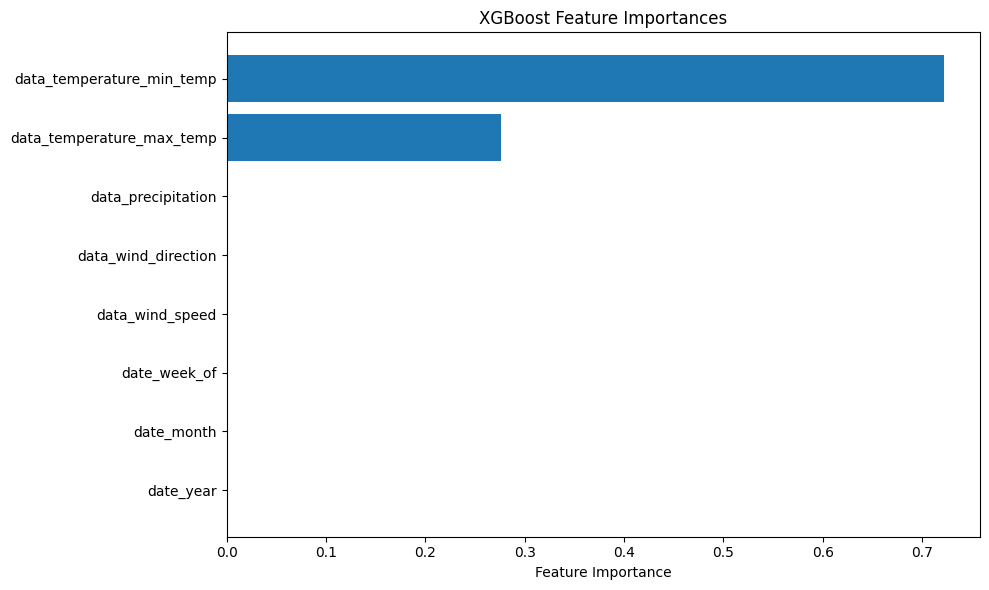

In [ ]:
import matplotlib.pyplot as plt

# Extract feature names and importances from sorted_xgb_importances
feature_names_xgb = [item[0] for item in sorted_xgb_importances]
importances_xgb = [item[1] for item in sorted_xgb_importances]

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names_xgb[::-1], importances_xgb[::-1]) # Reverse for descending order in plot
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importances")
plt.tight_layout()
plt.show()

**Plot Actual vs Predicted**

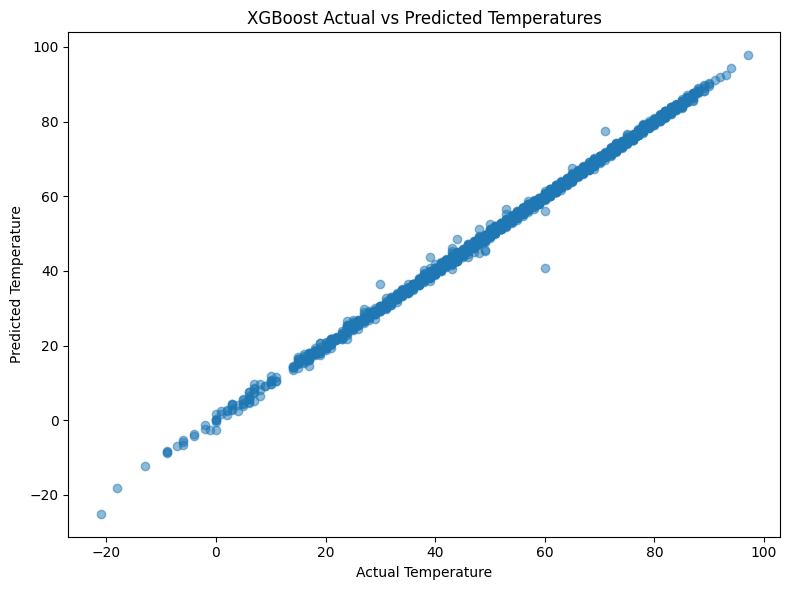

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, xgb_y_pred, alpha=0.5)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("XGBoost Actual vs Predicted Temperatures")
plt.tight_layout()
plt.show()

**Plot Residuals**

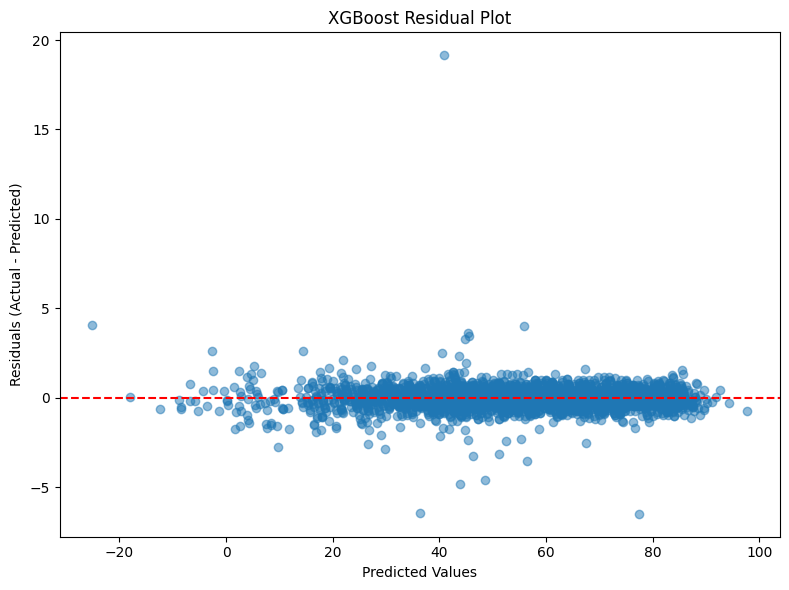

In [ ]:
xgb_residuals = y_test - xgb_y_pred

plt.figure(figsize=(8,6))
plt.scatter(xgb_y_pred, xgb_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("XGBoost Residual Plot")
plt.tight_layout()
plt.show()

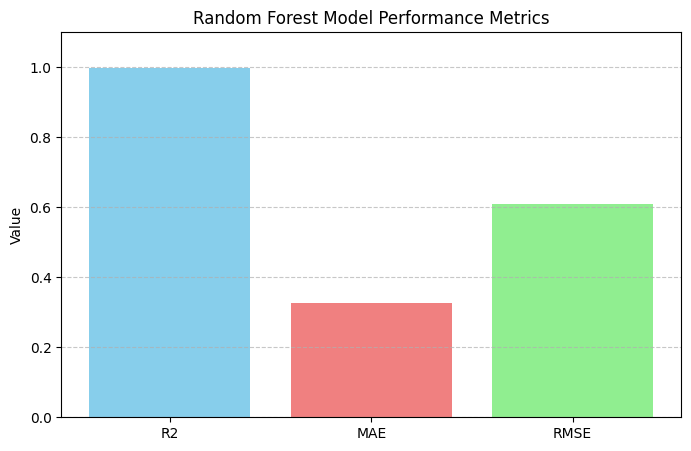

In [ ]:
metrics = {'R2': r2, 'MAE': mae, 'RMSE': rmse}
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

plt.figure(figsize=(8, 5))
plt.bar(metric_names, metric_values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.ylabel("Value")
plt.title("Random Forest Model Performance Metrics")
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

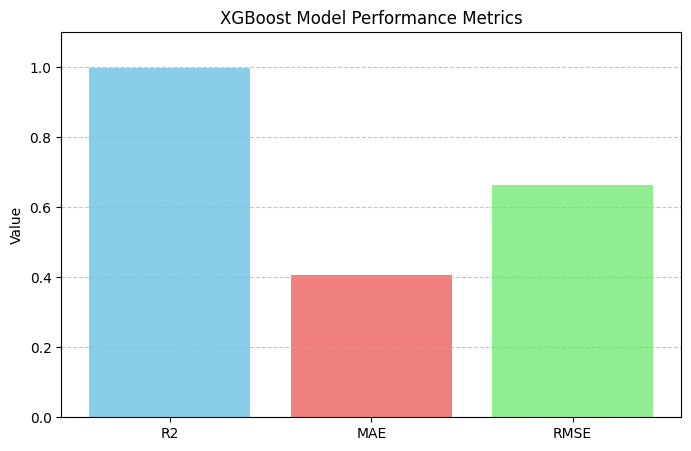

In [ ]:
metrics_xgb = {'R2': xgb_r2, 'MAE': xgb_mae, 'RMSE': xgb_rmse}
metric_names_xgb = list(metrics_xgb.keys())
metric_values_xgb = list(metrics_xgb.values())

plt.figure(figsize=(8, 5))
plt.bar(metric_names_xgb, metric_values_xgb, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.ylabel("Value")
plt.title("XGBoost Model Performance Metrics")
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

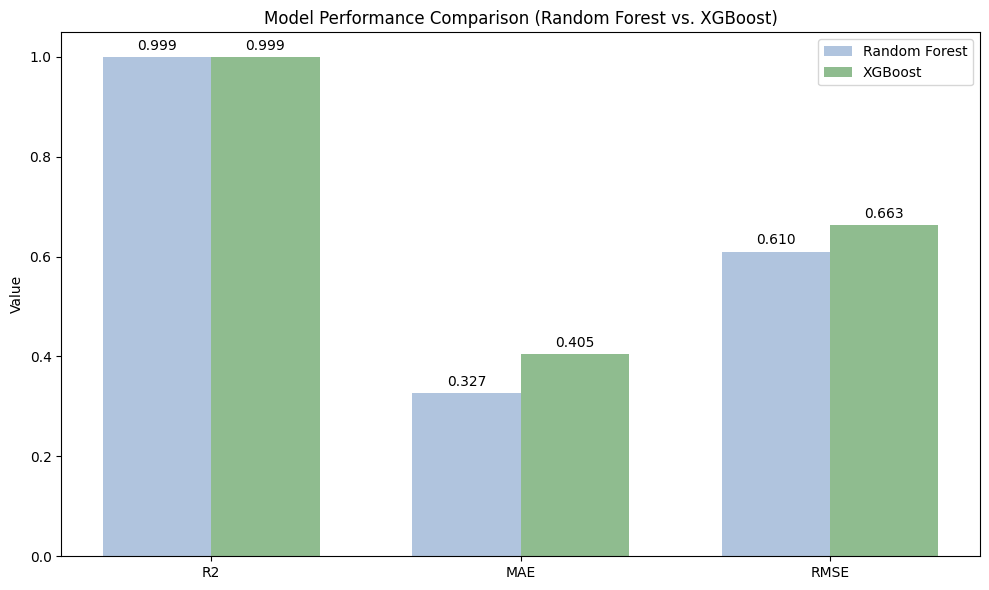

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
rf_metrics = [r2, mae, rmse]
xgb_metrics = [xgb_r2, xgb_mae, xgb_rmse]
metric_labels = ['R2', 'MAE', 'RMSE']
x = np.arange(len(metric_labels))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, rf_metrics, width, label='Random Forest', color='lightsteelblue')
rects2 = ax.bar(x + width/2, xgb_metrics, width, label='XGBoost', color='darkseagreen')
ax.set_ylabel('Value')
ax.set_title('Model Performance Comparison (Random Forest vs. XGBoost)')
ax.set_xticks(x)
ax.set_xticklabels(metric_labels)
ax.legend()
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()